## Chi square test to show goodness of fit
Did the data come from an expected multi-catagory distribution?

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
from collections import Counter
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

In [3]:
# number of rolls of the dice
nrolls = 120

In [4]:
# fair dice distribution
fair_rolls = np.random.randint(1, 7, size = (nrolls, ))
fair_rolls

array([1, 6, 4, 6, 3, 4, 1, 4, 4, 6, 4, 1, 2, 3, 6, 6, 3, 4, 6, 5, 6, 6,
       5, 3, 1, 4, 3, 4, 4, 2, 4, 2, 1, 1, 2, 3, 5, 5, 2, 3, 2, 1, 3, 4,
       5, 2, 6, 5, 5, 3, 5, 4, 2, 2, 3, 5, 4, 2, 6, 3, 4, 4, 4, 6, 3, 4,
       3, 5, 1, 4, 4, 5, 5, 2, 3, 6, 5, 6, 4, 2, 1, 1, 3, 3, 4, 1, 6, 5,
       4, 5, 1, 3, 1, 3, 1, 1, 5, 2, 5, 5, 4, 6, 2, 6, 1, 1, 6, 1, 4, 1,
       6, 5, 4, 4, 3, 4, 1, 5, 5, 4])

In [5]:
# weighted (unfair) rolls
unfair_rolls = np.random.choice(np.arange(1, 7), p = [0.1, 0.05, 0.3, 0.4, 0.05, 0.1], size = (nrolls,))
unfair_rolls

array([4, 4, 4, 3, 3, 4, 2, 6, 3, 6, 5, 3, 4, 3, 3, 3, 4, 6, 3, 3, 3, 3,
       4, 6, 4, 6, 6, 3, 4, 5, 4, 3, 4, 3, 3, 2, 4, 3, 1, 3, 3, 4, 4, 3,
       1, 6, 3, 2, 4, 6, 1, 3, 3, 6, 2, 6, 6, 3, 1, 6, 3, 1, 1, 3, 1, 3,
       3, 6, 4, 3, 4, 5, 4, 4, 4, 4, 6, 3, 4, 3, 3, 4, 4, 1, 6, 4, 4, 3,
       3, 4, 5, 4, 6, 4, 1, 3, 4, 1, 3, 3, 4, 6, 4, 3, 5, 4, 4, 4, 4, 4,
       4, 5, 4, 3, 3, 1, 5, 3, 4, 4])

In [6]:
# expected frequencies if perfectly fair
# note that of course they would be shuffled, but here shown in sequence
expected_rolls = np.array([num for roll in range(int(nrolls/6)) for num in range(1,7)])
expected_rolls

array([1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2,
       3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
       1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2,
       3, 4, 5, 6, 1, 2, 3, 4, 5, 6])

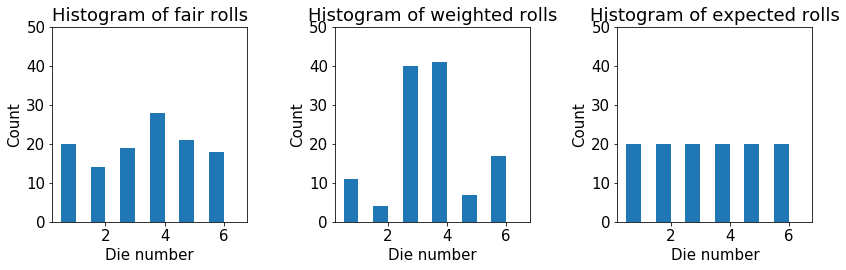

In [7]:
fig = plt.figure(figsize = (12, 4))
ax1 = fig.add_subplot(131)
ax1.hist(fair_rolls, bins = 6, range = (0.5, 6.5), width = 0.5)
ax1.set_ylim(0, 50)
ax1.set_title("Histogram of fair rolls")
ax1.set_xlabel("Die number")
ax1.set_ylabel("Count")

ax2 = fig.add_subplot(132)
ax2.hist(unfair_rolls, bins = 6, range = (0.5, 6.5), width = 0.5)
ax2.set_ylim(0, 50)
ax2.set_title('Histogram of weighted rolls')
ax2.set_xlabel("Die number")
ax2.set_ylabel("Count")


ax3 = fig.add_subplot(133)
ax3.hist(expected_rolls, bins = 6, range = (0.5, 6.5), width = 0.5)
ax3.set_ylim(0, 50)
ax3.set_title('Histogram of expected rolls')
ax3.set_xlabel("Die number")
ax3.set_ylabel("Count")

plt.tight_layout()

In [8]:
# get frequencies for fair counts
fair_counts = Counter(fair_rolls)
print("Fair die counts:")
for die_num, count in sorted(fair_counts.items()):
    print("Die number: {0}, count: {1}".format(die_num, count))
fair_freqs = [fair_counts[i] for i in range(1, 7)]

Fair die counts:
Die number: 1, count: 20
Die number: 2, count: 14
Die number: 3, count: 19
Die number: 4, count: 28
Die number: 5, count: 21
Die number: 6, count: 18


In [9]:
# frequencies for unfair counts
unfair_counts = Counter(unfair_rolls)
print("Unfair die counts:")
for die_num, count in sorted(unfair_counts.items()):
    print("Die number: {0}, count: {1}".format(die_num, count))
unfair_freqs = [unfair_counts[i] for i in range(1, 7)]

Unfair die counts:
Die number: 1, count: 11
Die number: 2, count: 4
Die number: 3, count: 40
Die number: 4, count: 41
Die number: 5, count: 7
Die number: 6, count: 17


In [10]:
# frequencies for expected counts (if fair)
expected_counts = Counter(expected_rolls)
print("Expected die counts:")
for die_num, count in sorted(expected_counts.items()):
    print("Die number: {0}, count: {1}".format(die_num, count))
expected_freqs = [expected_counts[i] for i in range(1, 7)]

Expected die counts:
Die number: 1, count: 20
Die number: 2, count: 20
Die number: 3, count: 20
Die number: 4, count: 20
Die number: 5, count: 20
Die number: 6, count: 20


In [11]:
ans_fair = stats.chisquare(fair_freqs, expected_freqs, axis=0)
ans_fair

Power_divergenceResult(statistic=5.300000000000001, pvalue=0.38037503234347064)

In scipy stats, the chisquare Null Hypothesis assumption is that the data came from the same distribution.  A high p-value here indicates that the fair_freqs data was very likely to have come from the same distribution that made the expected_freqs

In [12]:
ans_unfair = stats.chisquare(unfair_freqs, expected_freqs, axis=0)
ans_unfair

Power_divergenceResult(statistic=67.80000000000001, pvalue=2.9386744358408433e-13)

A large test statistic and low p-value, we can reject the null (came from the same distribution) and accept the alternative (they didn't).